In [172]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [173]:
events = pd.read_csv('Dataset/events.csv')
ginf = pd.read_csv('Dataset/ginf.csv')
df = ginf.merge(events, how='left')

In [174]:
new = dict()
with open('Dataset/dictionary.txt','r') as f:
    data=f.read()
data = data.split('\n\n\n')
for i in range(len(data)):
    if data[i]:
        variable_name = data[i].split('\n')[0]
        values = data[i].split('\n')[1:]
        new[variable_name]={int(s.split('\t')[0]):s.split('\t')[1] for s in values}
for name in new:
    df[name] = df[name].map(new[name])

In [250]:
goals = df[df['is_goal'] == 1 & (df['event_type2'] != 'Own goal')]

In [251]:
top_scorers = goals.rename(columns={'is_goal':'goals'})
top_scorers = top_scorers.groupby('player')['goals'].sum().reset_index()
top_scorers = top_scorers.sort_values(by='goals', ascending=False)
top_scorers = top_scorers.set_index('player')
top_scorers[:20]

,goals
player,
lionel messi,205.0
cristiano ronaldo,197.0
zlatan ibrahimovic,153.0
robert lewandowski,124.0
edinson cavani,121.0
gonzalo higuain,118.0
pierreemerick aubameyang,100.0
luis suarez,96.0
diego costa,93.0


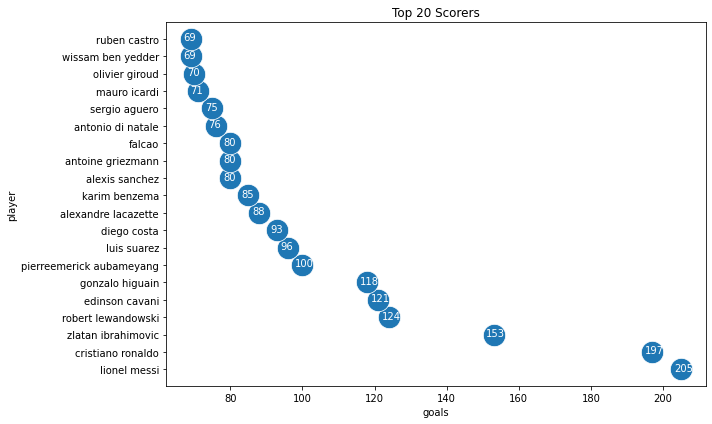

In [322]:
data = top_scorers[:20]
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=data['goals'], y=data.index, s=500)
for i,j in enumerate(data['goals']):
    ax.text(j-2, i-0.1, int(j), color='white')
plt.title('Top 20 Scorers')
plt.tight_layout()
plt.show()

In [327]:
assists = df[df['is_goal'] == 1 & (df['event_type2'] == 'Key Pass')]

In [331]:
top_assists = assists.rename(columns={'is_goal':'assists'})
top_assists = top_assists.groupby('player2')['assists'].sum().reset_index()
top_assists = top_assists.sort_values(by='assists', ascending=False)
top_assists = top_assists.set_index('player2')
top_assists[:20]

,assists
player2,
lionel messi,75.0
angel di maria,69.0
gonzalo castro,66.0
cesc fabregas,60.0
dimitri payet,60.0
mesut ozil,57.0
marek hamsik,56.0
cristiano ronaldo,53.0
kevin de bruyne,51.0


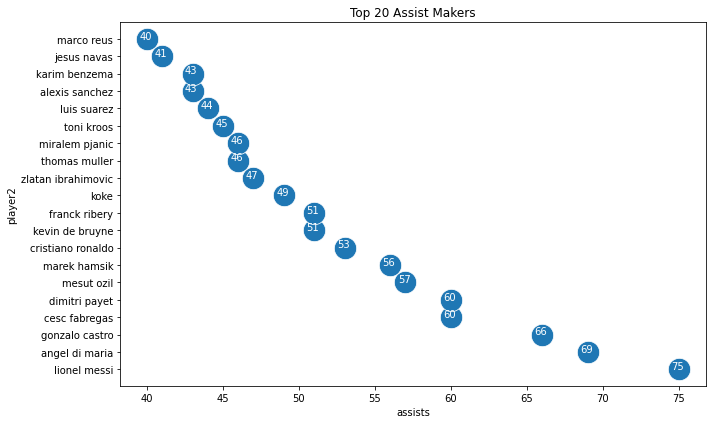

In [344]:
data = top_assists[:20]
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=data['assists'], y=data.index, s=500)
for i,j in enumerate(data['assists']):
    ax.text(j-0.5, i, int(j), color='white')
plt.title('Top 20 Assist Makers')
plt.tight_layout()
plt.show()

In [268]:
top_scorers_per_match = goals.rename(columns={'is_goal':'goals', 'id_odsp':'match'})
top_scorers_per_match = top_scorers_per_match.groupby(['match','player'])['goals'].sum().reset_index()
top_scorers_per_match = top_scorers_per_match.groupby('player').agg({'match':'count', 'goals':'sum'})
top_scorers_per_match['goals_per_match'] = top_scorers_per_match['goals'] / top_scorers_per_match['match']
top_scorers_per_match = top_scorers_per_match.sort_values(by='goals_per_match', ascending=False)
top_scorers_per_match = top_scorers_per_match[top_scorers_per_match['match'] > top_scorers_per_match['match'].max()*0.25]
top_scorers_per_match[:20]

,Match,goals,goals_per_match
player,,,
lionel messi,178,205.0,1.151685
cristiano ronaldo,177,198.0,1.118644
luis suarez,106,96.0,0.905660
zlatan ibrahimovic,171,153.0,0.894737
sergio aguero,95,75.0,0.789474
robert lewandowski,171,124.0,0.725146
harry kane,95,65.0,0.684211
edinson cavani,179,121.0,0.675978
gonzalo higuain,176,118.0,0.670455


Text(0.5, 1.0, 'Goals Per Match')

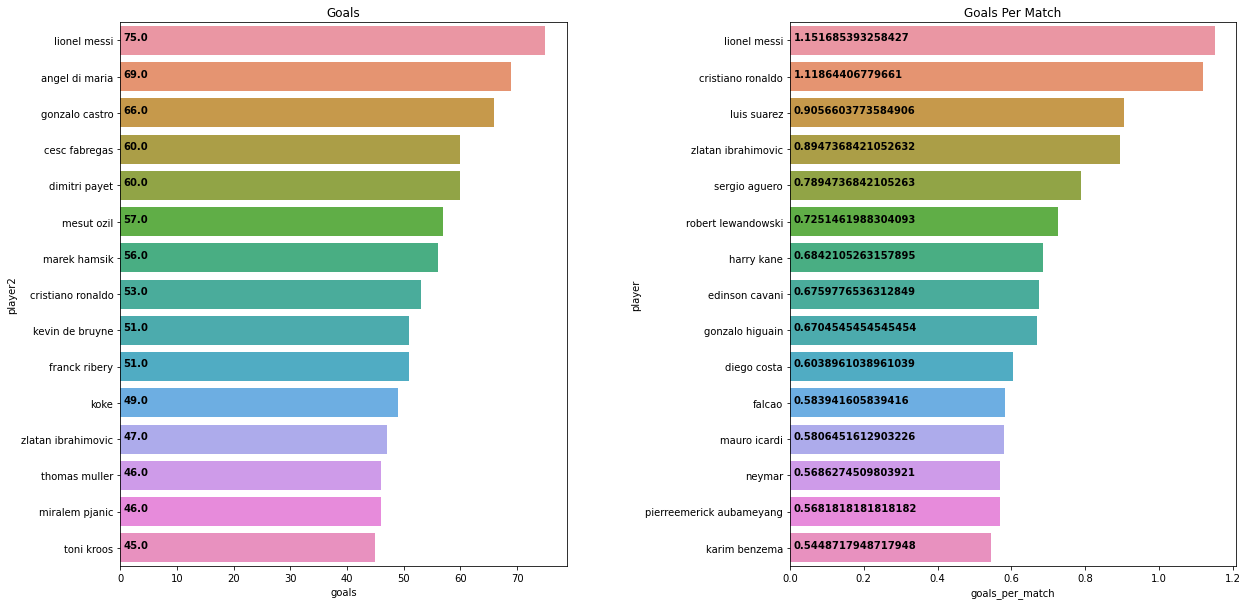

In [372]:
plt.figure(figsize=(20,10))

data = top_scorers[:15]
x = 'goals'
y = top_scorers.index[:15]
plt.subplot(121)
ax=sns.barplot(x=x, y=y, data=data)
for i,j in enumerate(data[x][:15]):
    ax.text(0.5, i, j, weight='bold')
plt.title("Goals")

data = top_scorers_per_match[:15]
x = 'goals_per_match'
y = top_scorers_per_match.index[:15]
plt.subplot(122)
plt.subplots_adjust(wspace=.5)
ax=sns.barplot(x=x, y=y, data=data)
for i,j in enumerate(data[x][:15]):
    ax.text(0.01, i, j, weight='bold')
plt.title('Goals Per Match')

In [304]:
np_goals = df[(df['event_type2'] != 'Own goal') & (df['location'] != 'Penalty spot')]

In [305]:
np_top_scorers_per_match = np_goals.rename(columns={'is_goal':'np_goals', 'id_odsp':'match'})
np_top_scorers_per_match = np_top_scorers_per_match.groupby(['match','player'])['np_goals'].sum().reset_index()
np_top_scorers_per_match = np_top_scorers_per_match.groupby('player').agg({'match':'count', 'np_goals':'sum'})
np_top_scorers_per_match['np_goals_per_match'] = np_top_scorers_per_match['np_goals'] / np_top_scorers_per_match['match']
np_top_scorers_per_match = np_top_scorers_per_match.sort_values(by='np_goals_per_match', ascending=False)
np_top_scorers_per_match = np_top_scorers_per_match[np_top_scorers_per_match['match'] > 31]
np_top_scorers_per_match[:20]

,Match,np_goals,np_goals_per_match
player,,,
lionel messi,178,175.0,0.983146
luis suarez,106,93.0,0.877358
cristiano ronaldo,177,154.0,0.870056
zlatan ibrahimovic,171,118.0,0.690058
robert lewandowski,171,115.0,0.672515
sergio aguero,94,63.0,0.670213
gonzalo higuain,176,107.0,0.607955
gareth bale,85,49.0,0.576471
edinson cavani,179,101.0,0.564246


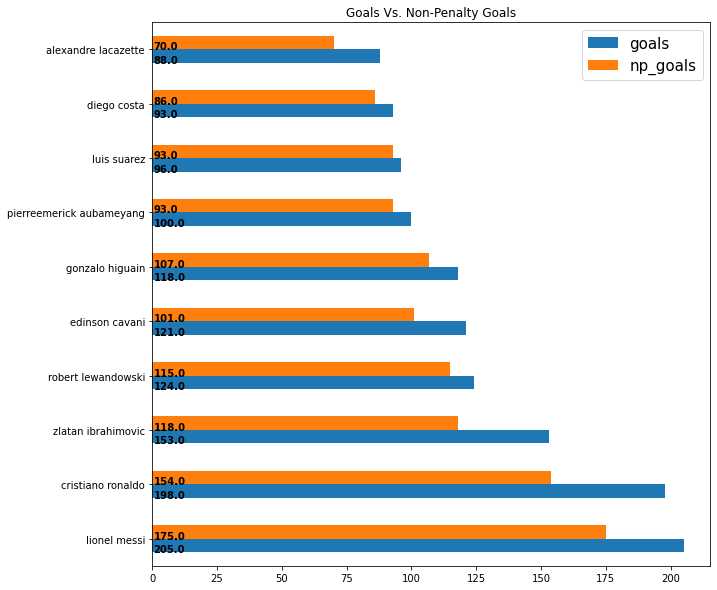

In [370]:
data = pd.concat([top_scorers_per_match, np_top_scorers_per_match], axis=1)
data = data.sort_values(by='goals', ascending=False)[['goals', 'np_goals']][:10]
ax = data.plot(kind='barh', figsize=(10,10))
plt.title('Goals Vs. Non-Penalty Goals')
plt.legend(loc='best', prop={'size':15})
for i,j in enumerate(data.iloc[:,1]):
    ax.text(0.5, i, j, weight='bold')
for i,j in enumerate(data.iloc[:,0]):
    ax.text(0.5, i-0.25, j, weight='bold')

In [379]:
# Attempts and Goals
attempts = df[(df['event_type2'] != 'Own goal') & (df['location'] != 'Penalty spot') & (df['event_type'] == 'Attempt')]
print(attempts.shape)

(225838, 39)


In [380]:
attempts = attempts.rename(columns={'is_goal':'goals', 'id_odsp':'match', 'event_type':'attempts'})
attempts = attempts.groupby(['player','match']).agg({'attempts':'count', 'goals':'sum'}).reset_index()
attempts['goals_per_attempts'] = attempts['goals'] / attempts['attempts']
attempts = attempts.groupby('player').agg({'attempts':'sum', 'goals':'sum', 'match':'count', 'goals_per_attempts':'mean'})
attempts['attempts_per_match'] = attempts['attempts'] / attempts['match']
attempts['goals_per_match'] = attempts['goals'] / attempts['match']
attempts = attempts[attempts['goals'] > 18]
attempts = attempts.sort_values(by='attempts', ascending=False)
attempts[:20]

,attempts,goals,match,goals_per_attempts,attempts_per_match,goals_per_match
player,,,,,,
cristiano ronaldo,1138,154.0,177,0.141942,6.429379,0.870056
lionel messi,877,175.0,178,0.211860,4.926966,0.983146
zlatan ibrahimovic,736,118.0,169,0.173506,4.355030,0.698225
robert lewandowski,623,115.0,168,0.182212,3.708333,0.684524
edinson cavani,596,101.0,166,0.179650,3.590361,0.608434
pierreemerick aubameyang,570,93.0,166,0.161353,3.433735,0.560241
gonzalo higuain,537,107.0,163,0.211267,3.294479,0.656442
antonio candreva,534,28.0,167,0.052153,3.197605,0.167665
antonio di natale,496,63.0,136,0.125933,3.647059,0.463235


Text(0.5, 1.0, 'Attempts Per Match')

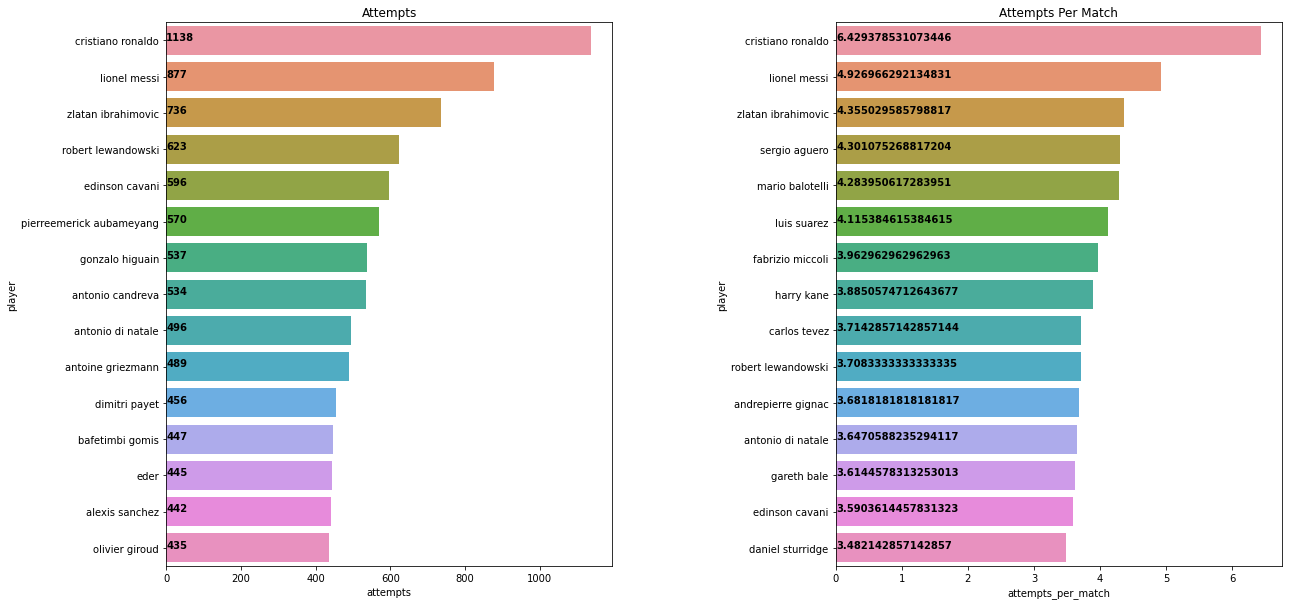

In [381]:
plt.figure(figsize=(20,10))

data = attempts[:15]
x = 'attempts'
y = attempts.index[:15]
plt.subplot(121)
ax=sns.barplot(x=x, y=y, data=data)
for i,j in enumerate(data[x][:15]):
    ax.text(0.5, i, j, weight='bold')
plt.title("Attempts")

attempts = attempts.sort_values(by='attempts_per_match', ascending=False)
data = attempts[:15]
x = 'attempts_per_match'
y = attempts.index[:15]
plt.subplot(122)
plt.subplots_adjust(wspace=.5)
ax=sns.barplot(x=x, y=y, data=data)
for i,j in enumerate(data[x][:15]):
    ax.text(0.01, i, j, weight='bold')
plt.title('Attempts Per Match')

Text(0.5, 1.0, 'Goals Per Attempts')

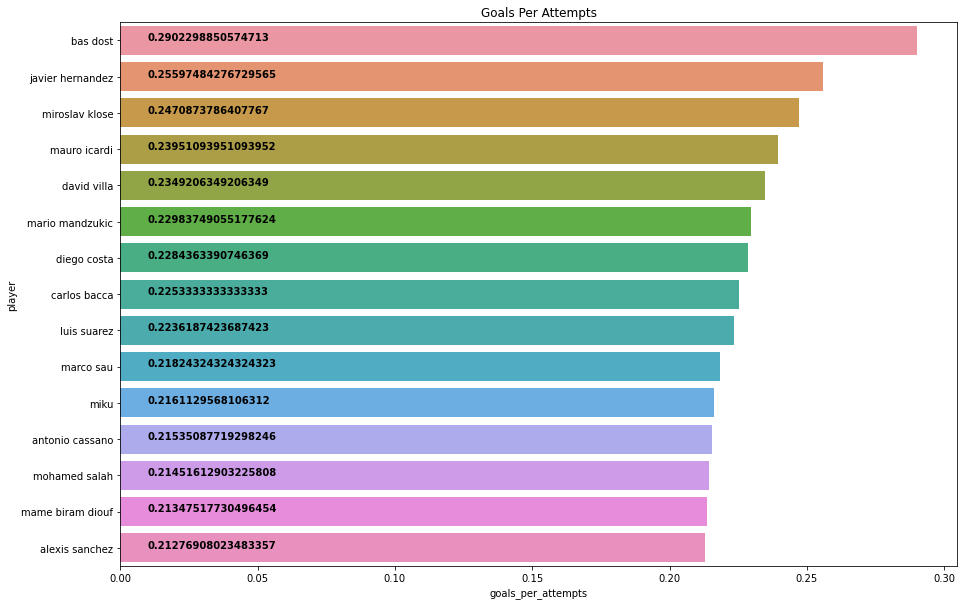

In [385]:
plt.figure(figsize=(15,10))

# data = attempts[:15]
# x = 'attempts'
# y = attempts.index[:15]
# plt.subplot(121)
# ax=sns.barplot(x=x, y=y, data=data)
# for i,j in enumerate(data[x][:15]):
#     ax.text(0.5, i, j, weight='bold')
# plt.title("Attempts")

attempts = attempts.sort_values(by='goals_per_attempts', ascending=False)
data = attempts[:15]
x = 'goals_per_attempts'
y = attempts.index[:15]
# plt.subplot(122)
# plt.subplots_adjust(wspace=.5)
ax=sns.barplot(x=x, y=y, data=data)
for i,j in enumerate(data[x][:15]):
    ax.text(0.01, i, j, weight='bold')
plt.title('Goals Per Attempts')

In [318]:
premiereleague = df[df['country'] == 'england']
bundesliga = df[df['country'] == 'germany']
ligue1 = df[df['country'] == 'france']
laliga = df[df['country'] == 'spain']
seriea = df[df['country'] == 'italy']